In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

2023-10-24 13:37:16.402349: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-24 13:37:16.403648: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 13:37:16.430671: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-24 13:37:16.431255: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-24 13:37:16.935488: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
# if os.path.isdir('train/barbutellus') is False:
#     os.makedirs('train/barbutellus')
#     os.makedirs('train/bohemicus')
#     os.makedirs('train/campestris')
#     os.makedirs('train/cryptarum')
#     os.makedirs('train/distinguendus')
#     os.makedirs('train/hortorum')
#     os.makedirs('train/hypnorum')
#     os.makedirs('train/jonellus')
#     os.makedirs('train/lapidarius')
#     os.makedirs('train/lucorum')
#     os.makedirs('train/magnus')
#     os.makedirs('train/monticola')
#     os.makedirs('train/muscorum')
#     os.makedirs('train/pascuorum')
#     os.makedirs('train/pratorum')
#     os.makedirs('train/ruderarius')
#     os.makedirs('train/rupestris')
#     os.makedirs('train/sylvarum')
#     os.makedirs('train/sylvestris')
#     os.makedirs('train/terrestris')
#     os.makedirs('train/vestalis')
    
#     os.makedirs('validate/barbutellus')
#     os.makedirs('validate/bohemicus')
#     os.makedirs('validate/campestris')
#     os.makedirs('validate/cryptarum')
#     os.makedirs('validate/distinguendus')
#     os.makedirs('validate/hortorum')
#     os.makedirs('validate/hypnorum')
#     os.makedirs('validate/jonellus')
#     os.makedirs('validate/lapidarius')
#     os.makedirs('validate/lucorum')
#     os.makedirs('validate/magnus')
#     os.makedirs('validate/monticola')
#     os.makedirs('validate/muscorum')
#     os.makedirs('validate/pascuorum')
#     os.makedirs('validate/pratorum')
#     os.makedirs('validate/ruderarius')
#     os.makedirs('validate/rupestris')
#     os.makedirs('validate/sylvarum')
#     os.makedirs('validate/sylvestris')
#     os.makedirs('validate/terrestris')
#     os.makedirs('validate/vestalis')
    
#     for i in random.sample(glob.glob('*barbutellus*'), 24):
#         shutil.move(i, 'train/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 24):
#         shutil.move(i, 'train/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 24):
#         shutil.move(i, 'train/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 24):
#         shutil.move(i, 'train/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 24):
#         shutil.move(i, 'train/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 24):
#         shutil.move(i, 'train/hortorum')
#     for i in random.sample(glob.glob('*hypnorum*'), 24):
#         shutil.move(i, 'train/hypnorum')      
#     for i in random.sample(glob.glob('*jonellus*'), 24):
#         shutil.move(i, 'train/jonellus')
#     for i in random.sample(glob.glob('*lapidarius*'), 24):
#         shutil.move(i, 'train/lapidarius')
#     for i in random.sample(glob.glob('*lucorum*'), 24):
#         shutil.move(i, 'train/lucorum')
#     for i in random.sample(glob.glob('*magnus*'), 24):
#         shutil.move(i, 'train/magnus')
#     for i in random.sample(glob.glob('*monticola*'), 24):
#         shutil.move(i, 'train/monticola')
#     for i in random.sample(glob.glob('*muscorum*'), 24):
#         shutil.move(i, 'train/muscorum')      
#     for i in random.sample(glob.glob('*pascuorum*'), 24):
#         shutil.move(i, 'train/pascuorum')
#     for i in random.sample(glob.glob('*pratorum*'), 24):
#         shutil.move(i, 'train/pratorum')
#     for i in random.sample(glob.glob('*ruderarius*'), 24):
#         shutil.move(i, 'train/ruderarius')
#     for i in random.sample(glob.glob('*rupestris*'), 24):
#         shutil.move(i, 'train/rupestris')
#     for i in random.sample(glob.glob('*sylvarum*'), 24):
#         shutil.move(i, 'train/sylvarum')
#     for i in random.sample(glob.glob('*sylvestris*'), 24):
#         shutil.move(i, 'train/sylvestris')      
#     for i in random.sample(glob.glob('*terrestris*'), 24):
#         shutil.move(i, 'train/terrestris')
#     for i in random.sample(glob.glob('*vestalis*'), 24):
#         shutil.move(i, 'train/vestalis')
        
#     for i in random.sample(glob.glob('*barbutellus*'), 6):
#         shutil.move(i, 'validate/barbutellus')      
#     for i in random.sample(glob.glob('*bohemicus*'), 6):
#         shutil.move(i, 'validate/bohemicus')
#     for i in random.sample(glob.glob('*campestris*'), 6):
#         shutil.move(i, 'validate/campestris')
#     for i in random.sample(glob.glob('*cryptarum*'), 6):
#         shutil.move(i, 'validate/cryptarum')
#     for i in random.sample(glob.glob('*distinguendus*'), 6):
#         shutil.move(i, 'validate/distinguendus')
#     for i in random.sample(glob.glob('*hortorum*'), 6):
#         shutil.move(i, 'validate/hortorum')
#     for i in random.sample(glob.glob('*hypnorum*'), 6):
#         shutil.move(i, 'validate/hypnorum')      
#     for i in random.sample(glob.glob('*jonellus*'), 6):
#         shutil.move(i, 'validate/jonellus')
#     for i in random.sample(glob.glob('*lapidarius*'), 6):
#         shutil.move(i, 'validate/lapidarius')
#     for i in random.sample(glob.glob('*lucorum*'), 6):
#         shutil.move(i, 'validate/lucorum')
#     for i in random.sample(glob.glob('*magnus*'), 6):
#         shutil.move(i, 'validate/magnus')
#     for i in random.sample(glob.glob('*monticola*'), 6):
#         shutil.move(i, 'validate/monticola')
#     for i in random.sample(glob.glob('*muscorum*'), 6):
#         shutil.move(i, 'validate/muscorum')      
#     for i in random.sample(glob.glob('*pascuorum*'), 6):
#         shutil.move(i, 'validate/pascuorum')
#     for i in random.sample(glob.glob('*pratorum*'), 6):
#         shutil.move(i, 'validate/pratorum')
#     for i in random.sample(glob.glob('*ruderarius*'), 6):
#         shutil.move(i, 'validate/ruderarius')
#     for i in random.sample(glob.glob('*rupestris*'), 6):
#         shutil.move(i, 'validate/rupestris')
#     for i in random.sample(glob.glob('*sylvarum*'), 6):
#         shutil.move(i, 'validate/sylvarum')
#     for i in random.sample(glob.glob('*sylvestris*'), 6):
#         shutil.move(i, 'validate/sylvestris')      
#     for i in random.sample(glob.glob('*terrestris*'), 6):
#         shutil.move(i, 'validate/terrestris')
#     for i in random.sample(glob.glob('*vestalis*'), 6):
#         shutil.move(i, 'validate/vestalis')

In [3]:
train_path = 'train'
validate_path = 'validate'
#test_path = 'test'

In [4]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                                  'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                                  'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                                  'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=12)
validate_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
    .flow_from_directory(directory=validate_path, target_size=(224,224), 
                         classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
                         'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
                         'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
                         'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=12)
# test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input) \
#     .flow_from_directory(directory=test_path, target_size=(224,224), 
#                          classes=['barbutellus', 'bohemicus', 'campestris', 'cryptarum', 'distinguendus', 
#                          'hortorum', 'hypnorum', 'jonellus', 'lapidarius', 'lucorum', 'magnus', 
#                          'monticola', 'muscorum', 'pascuorum', 'pratorum', 'ruderarius', 'rupestris',
#                          'sylvarum', 'sylvestris', 'terrestris', 'vestalis'], batch_size=12, shuffle=False)

Found 504 images belonging to 21 classes.
Found 125 images belonging to 21 classes.


In [5]:
imgs, labels = next(train_batches)

In [6]:
def plotImages(images_arr):
    fig, axes = plt.subplots(2, 6, figsize=(30,30))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

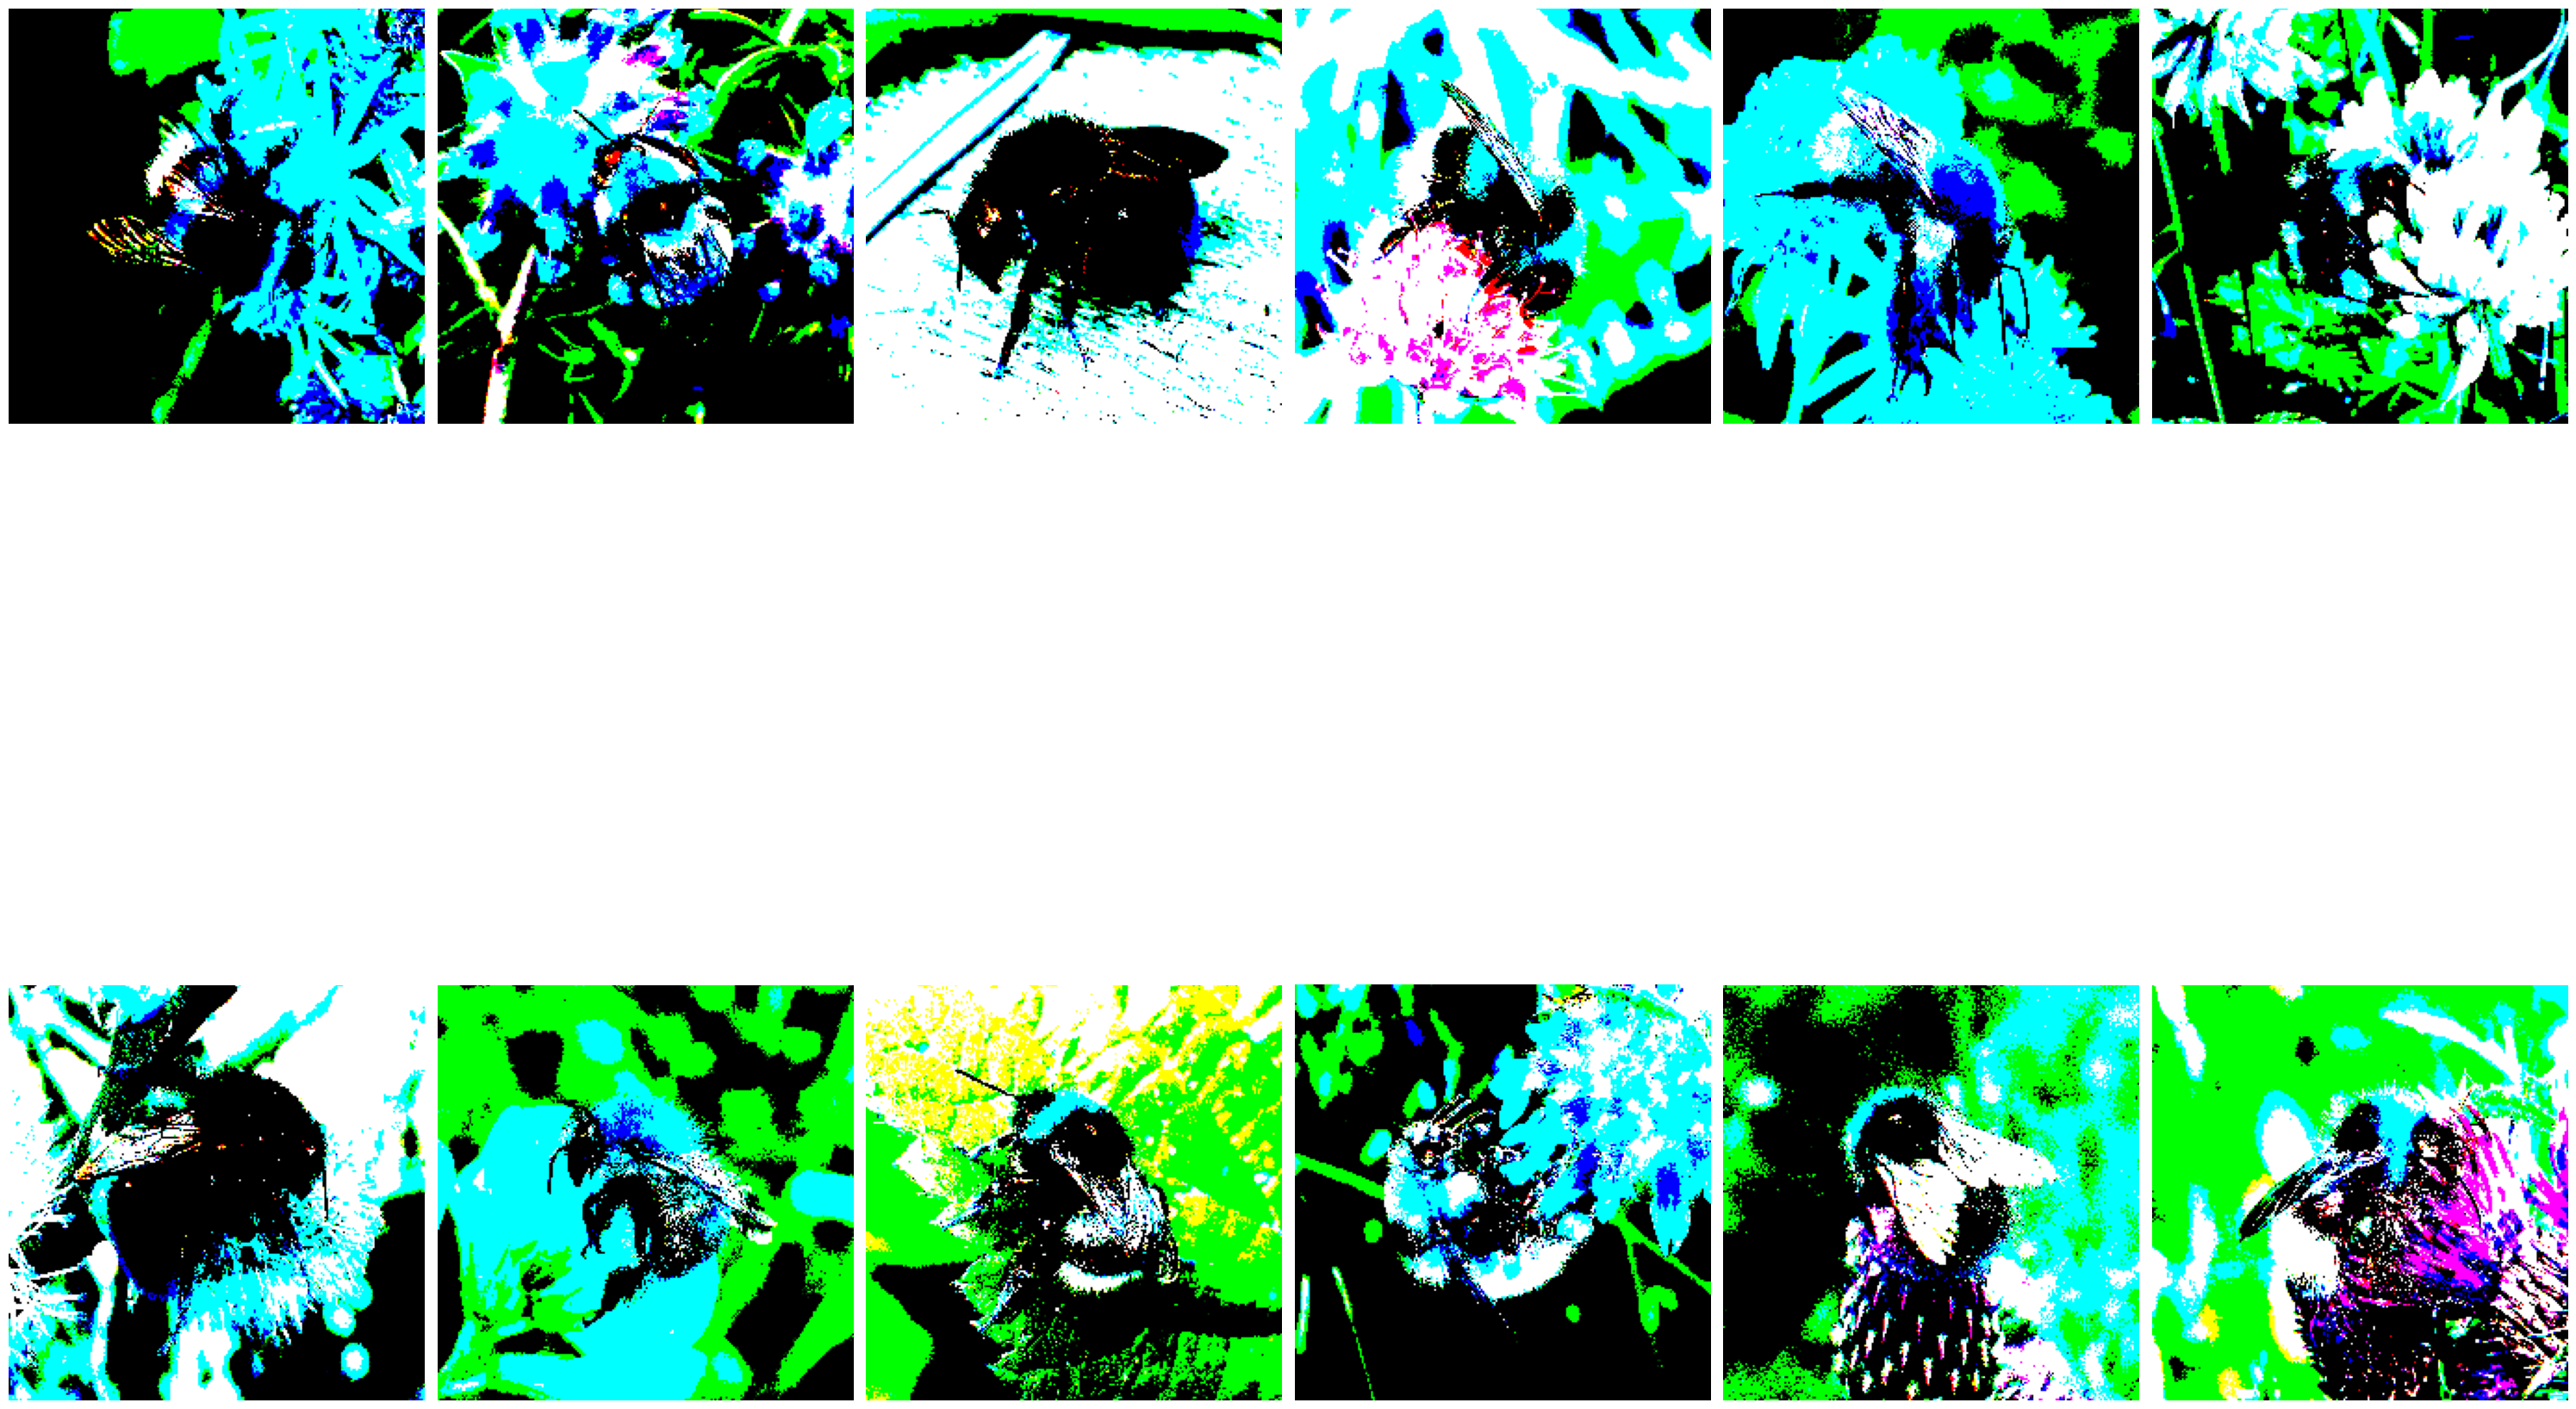

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


In [7]:
plotImages(imgs)
print(labels)

In [8]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding = 'same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=21, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 21)                4

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches,
    steps_per_epoch=len(train_batches),
    validation_data=validate_batches,
    validation_steps=len(validate_batches),
    epochs=15,
    verbose=2
)

Epoch 1/15
42/42 - 6s - loss: 128.5423 - accuracy: 0.0556 - val_loss: 40.3147 - val_accuracy: 0.0400 - 6s/epoch - 146ms/step
Epoch 2/15
42/42 - 6s - loss: 8.4779 - accuracy: 0.5952 - val_loss: 17.2918 - val_accuracy: 0.1200 - 6s/epoch - 134ms/step
Epoch 3/15
42/42 - 6s - loss: 0.6142 - accuracy: 0.9147 - val_loss: 15.0045 - val_accuracy: 0.1200 - 6s/epoch - 132ms/step
Epoch 4/15
42/42 - 6s - loss: 0.1251 - accuracy: 0.9702 - val_loss: 18.0251 - val_accuracy: 0.1280 - 6s/epoch - 134ms/step
Epoch 5/15
42/42 - 6s - loss: 0.1667 - accuracy: 0.9762 - val_loss: 17.3736 - val_accuracy: 0.1040 - 6s/epoch - 133ms/step
Epoch 6/15
42/42 - 6s - loss: 0.0813 - accuracy: 0.9782 - val_loss: 15.4500 - val_accuracy: 0.1520 - 6s/epoch - 137ms/step
Epoch 7/15
42/42 - 6s - loss: 0.0673 - accuracy: 0.9881 - val_loss: 15.9518 - val_accuracy: 0.1280 - 6s/epoch - 136ms/step
Epoch 8/15
42/42 - 6s - loss: 0.0215 - accuracy: 0.9960 - val_loss: 14.6307 - val_accuracy: 0.1280 - 6s/epoch - 133ms/step
Epoch 9/15
42/